#**Data Spaces**
###**Matteo Stoisa**

###INTRODUZIONE
Questa tesina si propone di analizzare un dataset e applicare ad esso algoritmi finalizzati alla predizione di un valore target. Il dataset che ho scelto (https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset#dataset-of-10s.csv) è composto da piu' di 6000 differenti brani musicali estratti dalla piattaforma di riproduzione Spotify, risalenti alla decade 2010-2020. Il valore target e' un booleano che indica se il brano e' stato un flop o una hit sulla base di varie condizioni. 

Ho utilizzato il linguaggio Python3 in ambiente CoLab.

###*import delle librerie utilizzate e del file del dataset:*

In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import preprocessing

drive.mount('/content/gdrive', force_remount=True)
dataset_path = "/content/gdrive/My Drive/Colab Notebooks/the-spotify-hit-predictor-dataset/dataset-of-10s.csv"

###IL DATASET
Inizialmente il dataset comprende 6398 entry ognuna delle quali espone 19 attributi, non ci sono dati mancanti in alcuna riga. Ho distinto gli attributi in primari e secondari e splittato di conseguenza in 2 il dataset: gli attributi primari sono quelli numerici che utilizzero' per le mie analisi mentre quelli secondari non rappresentano informazioni utili. Ho aggiunto un attributo 'id' (intero univoco incrementale da 0) per identificare facilmente ogni riga e (se necessario) collegare il dataset primario a quello secondario. 

Gli attributi primari sono: 
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:

- instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:

- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

- duration_ms:  The duration of the track in milliseconds.

- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track (in milliseconds). This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.

- sections: The number of sections the particular track has. This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.

- target: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

Gli attributi secondari sono:
- track: The Name of the track.

- artist: The Name of the Artist.

- uri: The resource identifier for the track.

###*split del dataset sulla base degli attributi utili:*


In [0]:
whole_dataset = pd.read_csv(dataset_path, delimiter=",") 

whole_attributes = list(whole_dataset.columns.values)
secondary_attributes = ['track', 'artist', 'uri']
primary_attributes = []
for attribute in whole_attributes:
  if attribute not in secondary_attributes:
    primary_attributes.append(attribute)
    #print("'" + attribute + "', ")

dataset = whole_dataset.drop(columns = secondary_attributes)
secondary_dataset = whole_dataset.drop(columns = primary_attributes)

#print("- whole_dataset: {}\n  whole_attributes ({}): {}".format(whole_dataset.shape, len(whole_attributes), whole_dataset.columns.values))
#print("- dataset: {}\n  primary_attributes ({}): {}".format(dataset.shape, len(primary_attributes), dataset.columns.values))
#print("- secondary_dataset: {}\n  primary_attributes ({}): {}".format(secondary_dataset.shape, len(secondary_attributes), secondary_dataset.columns.values))


###ESPLORAZIONE DEI DATI


Di seguito vengono riportate come esempio le righe di un brano nei due differenti split:

In [3]:
print("dataset primario:")
print(dataset.iloc[[297]].to_string())
print(dataset.iloc[[298]].to_string())
print("\ndataset secondario:")
print(secondary_dataset.iloc[[297]].to_string())
print(secondary_dataset.iloc[[298]].to_string())

dataset primario:
     danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms  time_signature  chorus_hit  sections  target
297         0.571   0.568    1    -3.827     0       0.0703         0.218            0.0021     0.512    0.109  86.986       547733               4    39.40648        17       1
     danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms  time_signature  chorus_hit  sections  target
298          0.48   0.837   11    -5.495     0         0.24         0.103               0.0     0.128    0.652  91.916       246079               4    33.81769        12       0

dataset secondario:
       track                        artist                                   uri
297  Runaway  Kanye West Featuring Pusha T  spotify:track:3DK6m7It6Pw857FcQftMds
          track       artist                                   uri
298  El Hip Hop  Ari

danceability:


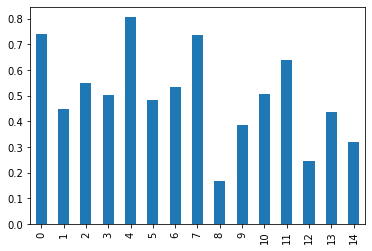

energy:


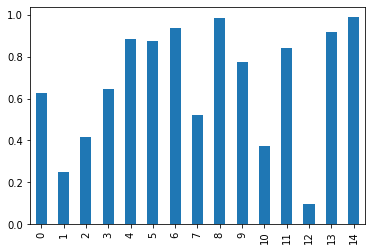

key:


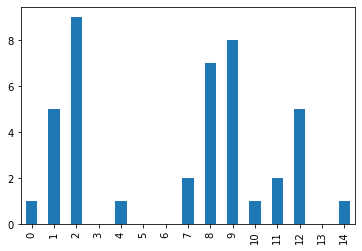

loudness:


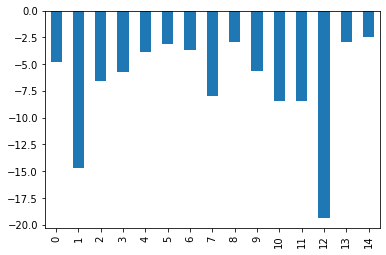

mode:


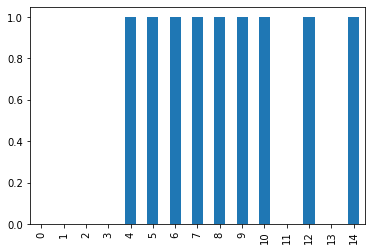

speechiness:


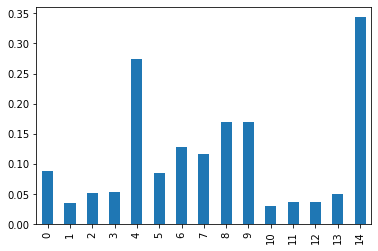

acousticness:


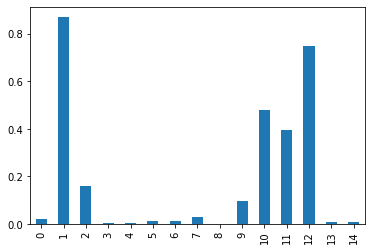

instrumentalness:


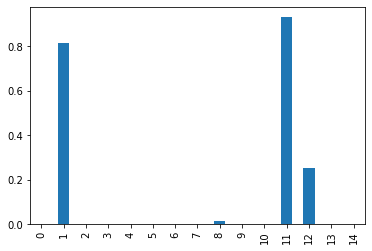

liveness:


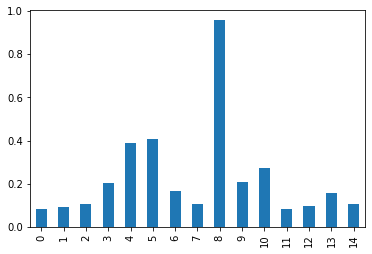

valence:


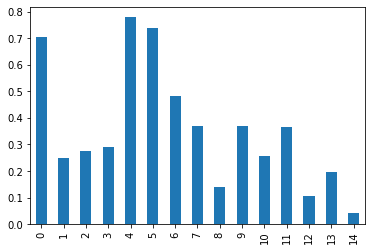

tempo:


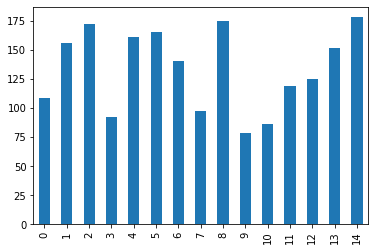

duration_ms:


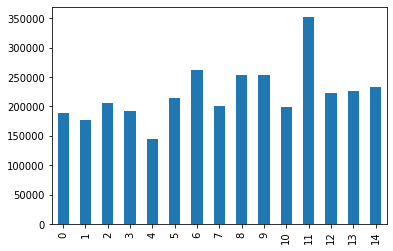

time_signature:


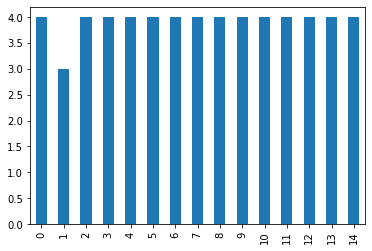

chorus_hit:


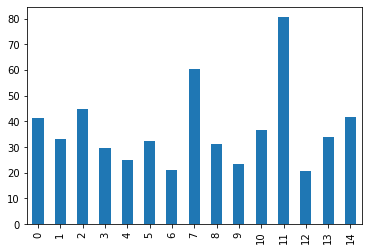

sections:


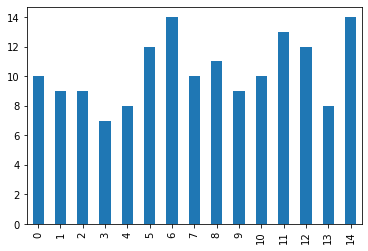

target:


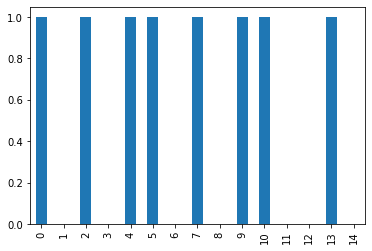

In [4]:
for attribute in primary_attributes:
  print(attribute + ":")
  dataset[attribute].head(15).plot(kind='bar')
  plt.show()

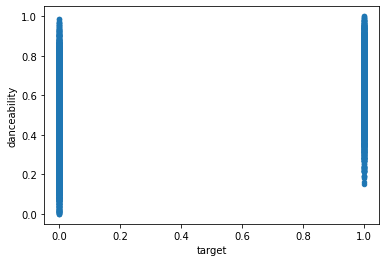

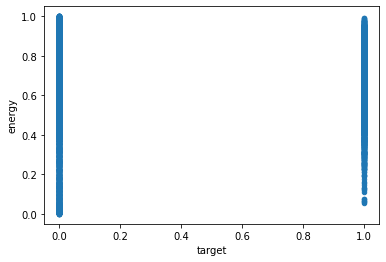

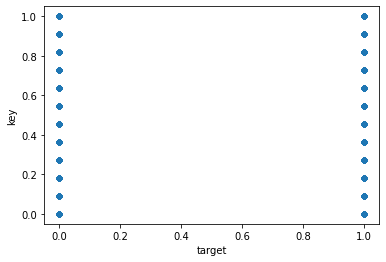

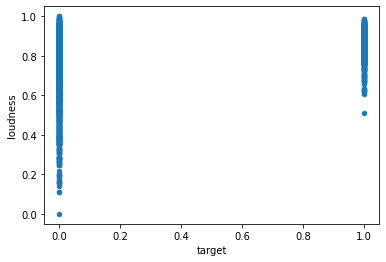

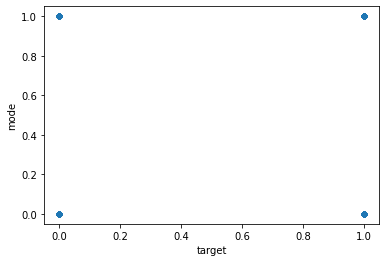

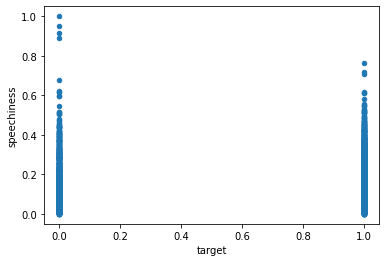

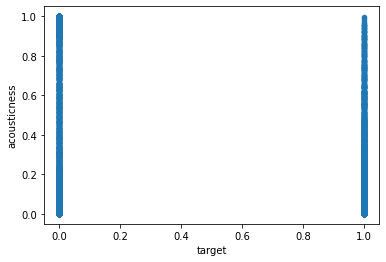

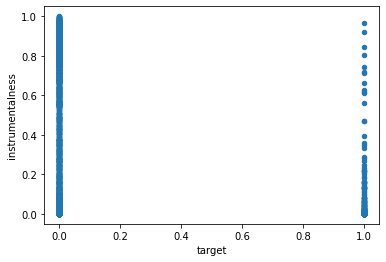

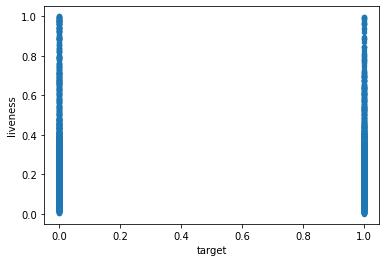

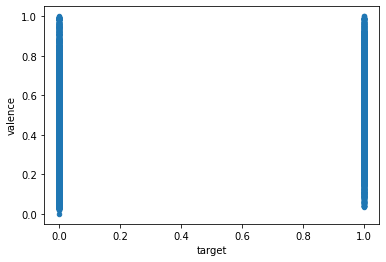

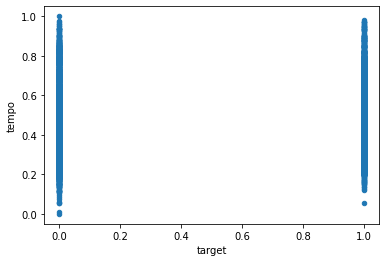

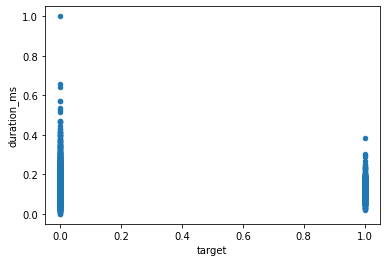

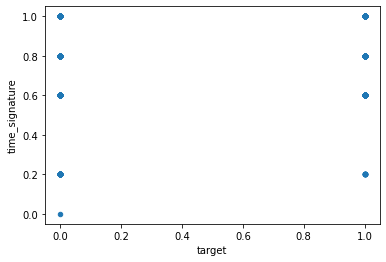

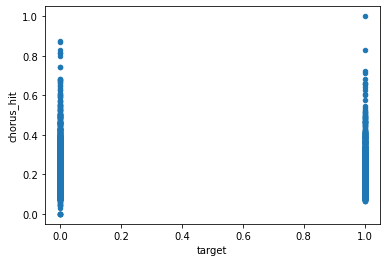

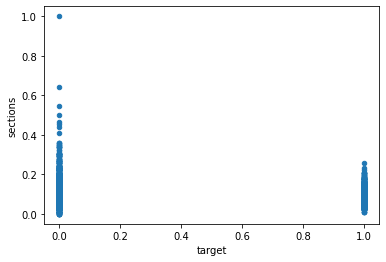

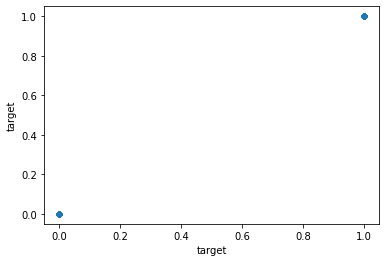

In [13]:
#TODO: da printare su uno stesso grafico in colori diversi
'''
for attribute in dataset.columns.values:
  print(attribute + ":")
  dataset.plot(kind='scatter',x='id',y=attribute, color='green')
  dataset0.plot(kind='scatter',x='id',y=attribute, color='blue')
  dataset1.plot(kind='scatter',x='id',y=attribute, color='red')
  plt.show()
'''
for attribute in dataset.columns.values:
  dataset.plot(kind='scatter', x='target',y=attribute)

Considerero' da qui in avanti come dataset il solo split primario ricavato.

Si nota subito che i dati non sono normalizzati, il valore duration_ms in particolare e' di 5/6 ordini di grandezza piu' grande rispetto agli altri.

In [7]:
scaler = preprocessing.MinMaxScaler()
atttributes_to_scale = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']
dataset[atttributes_to_scale] = scaler.fit_transform(dataset[atttributes_to_scale])
print(dataset.iloc[[297]].to_string())
print(dataset.iloc[[298]].to_string())

     danceability   energy       key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence     tempo  duration_ms  time_signature  chorus_hit  sections  target
297      0.553766  0.56846  0.090909  0.920913     0     0.051205      0.218876          0.002111  0.513105  0.11168  0.277475     0.303858             0.8    0.184872  0.174419       1
     danceability    energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness   valence     tempo  duration_ms  time_signature  chorus_hit  sections  target
298      0.454724  0.837797  1.0  0.885047     0     0.232994      0.103414               0.0  0.115301  0.668033  0.306204     0.126867             0.8    0.158653  0.116279       0


In [0]:
dataset0 = dataset[dataset.target.eq(0)]
dataset1 = dataset[dataset.target.eq(1)]


CLASSIFICAZIONE

- Linear regression

- Logistic regression

- Linear discriminant analysis 

- Gaussian Naive Bayes

- Random Forest

- Support Vector Machine  

- PCA

#ANALISI
- matrice di confusione